# AccelerateAI- Data Science Bootcamp 

### Simple Linear Regression with twist !
- Advanced Concept:  Data has Hetroscedasticity

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sbn 
import statsmodels.api as sm
import matplotlib.pyplot as plt 

###### The Dataset : Diamond price & characteristics
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. 
It's a great dataset for beginners learning to work with data analysis and visualization.<br>
Content:
- price : price in US dollars ($326 - $18,823)
- carat : weight of the diamond (0.2 - 5.01)
- cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color : diamond colour, from J (worst) to D (best)
- clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x       : length in mm (0 - 10.74)
- y       : width in mm (0 - 58.9)
- z       : depth in mm (0 - 31.8)

In [2]:
diamonds=sbn.load_dataset('diamonds', cache=True, data_home=None)
diamonds.sample(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
50239,0.71,Ideal,G,SI1,60.6,57.0,2233,5.72,5.80,3.49
21995,1.51,Premium,H,SI1,58.0,59.0,10063,7.57,7.54,4.38
21312,1.51,Very Good,I,VS1,61.8,63.0,9467,7.28,7.34,4.52
50618,0.31,Ideal,J,VS2,62.1,53.6,400,4.36,4.39,2.72


<AxesSubplot:xlabel='carat', ylabel='price'>

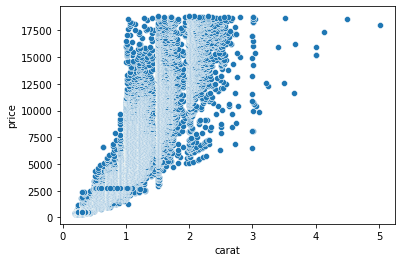

In [3]:
# Lets look at relationship of bodyfat with some of the body characteristics
sbn.scatterplot(data=diamonds, x="carat", y="price")

<AxesSubplot:xlabel='price', ylabel='Density'>

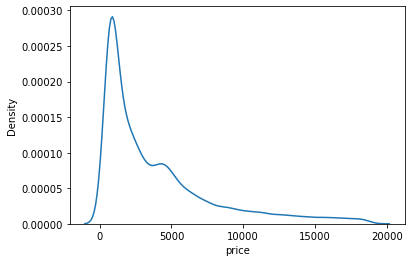

In [4]:
# Distribution of price 
sbn.kdeplot(x=diamonds.price)

In [5]:
# Let's train a linear regression model for price ~ carat 

Y = diamonds.price
X = diamonds.carat
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()
print(reg_model.summary())

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:37:33   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

D:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


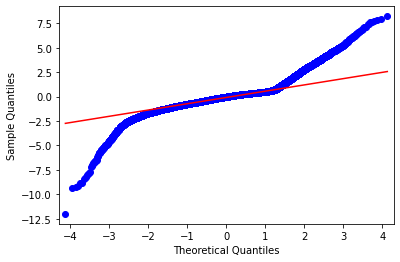

In [6]:
# Q-Q Plot
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

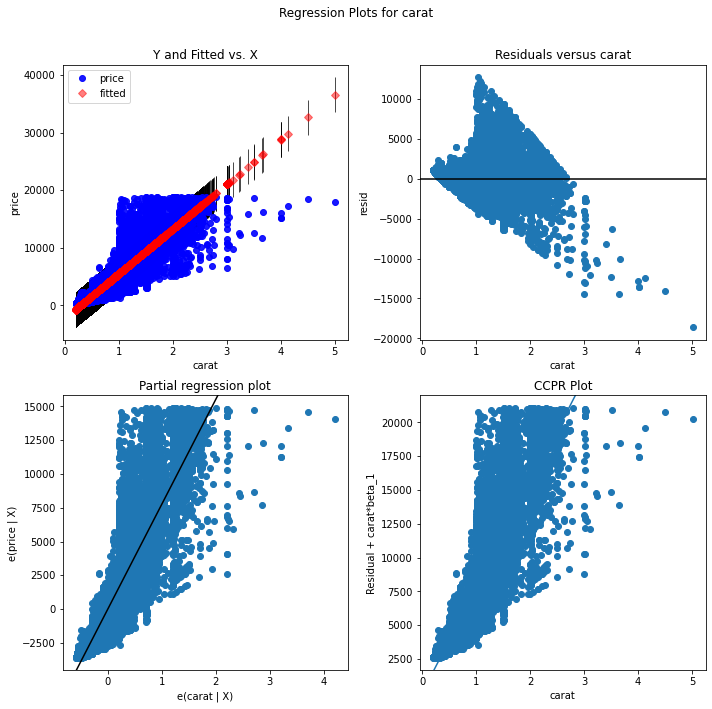

In [7]:
# Define figure size
figure = plt.figure(figsize=(10,10))

# Produce regression plots
fig=sm.graphics.plot_regress_exog(reg_model, 'carat', fig=figure)

##### Observation: There is severe hetroscedasticity

The Jarque-Bera test (Value >> 0) shows that the residuals has a non-normal distribution.
We can observe the same in Q-Q Plot as well.
The residual plot shows that there is severe hetroscedasticity in the data.

Remedy: Transformation of the data.


<AxesSubplot:xlabel='price', ylabel='Density'>

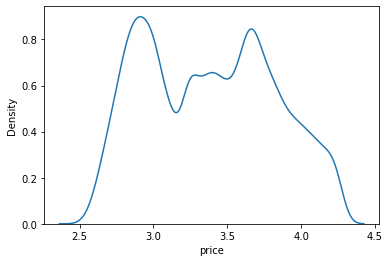

In [8]:
Y = np.log10(diamonds.price)

sbn.kdeplot(Y)

In [9]:
X = diamonds.carat
X = sm.add_constant(X) # adding a constant

logreg_model = sm.OLS(Y,X).fit()
print(logreg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.981e+05
Date:                Sun, 21 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:37:37   Log-Likelihood:                 18259.
No. Observations:               53940   AIC:                        -3.651e+04
Df Residuals:                   53938   BIC:                        -3.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6991      0.001   1856.116      0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


D:\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


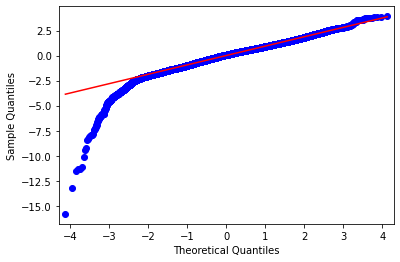

In [10]:
# Q-Q Plot
residuals = logreg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

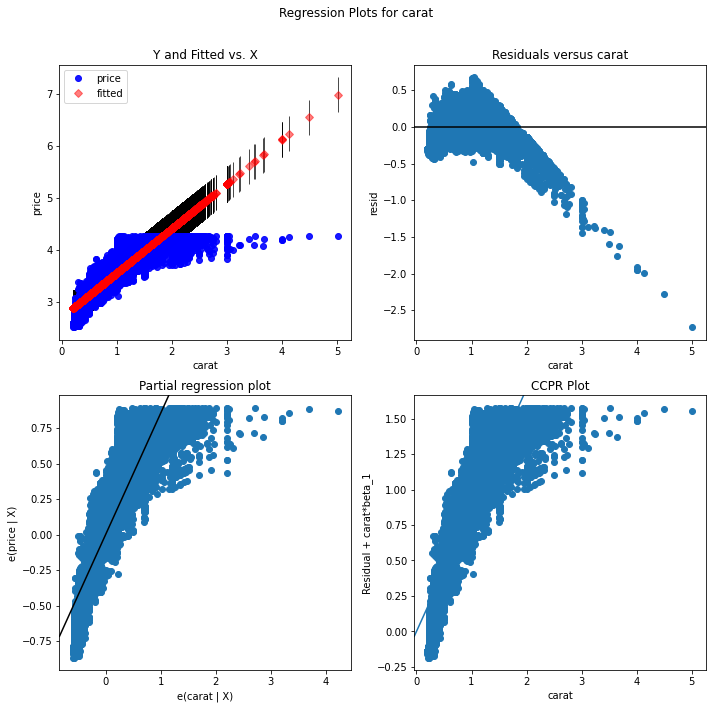

In [11]:
# Define figure size
figure = plt.figure(figsize=(10,10))

# Produce regression plots for logreg_model
fig=sm.graphics.plot_regress_exog(logreg_model, 'carat', fig=figure)

In [12]:
#fig = sm.graphics.influence_plot(logreg_model)

##### Conclusion: The residual plot still has a strong  hetroscedestacity, hence the transformation will not be effective. We will have to look at other modeling techniques like Robust Linear regression, or try other ML techniques. 